
# Imports and Magics

In [1]:
%matplotlib inline
from utils.setup import *

In [2]:
train = pd.read_csv(TRAIN_MERGED, index_col=0)
train.index = pd.to_datetime(train.index)

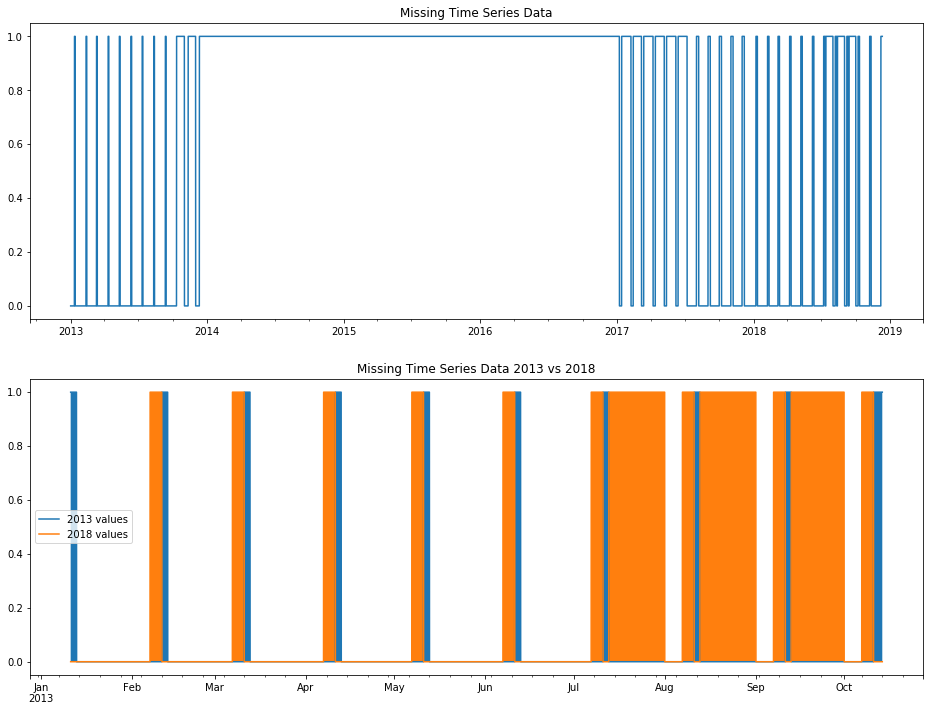

In [87]:
#duree = list(pd.date_range(start="2013-01-01 00:00", end="2018-12-10 23:30", freq='0.5H').normalize())
#duree = pd.Series([1 if ind in list(train.index) else 0 for ind in duree], index=duree, name='Inter')

miss = pd.Series.from_csv('miss_data.csv', index_col=0, header=None)
miss_2013 = miss['2013-01-11':"2013-10-13"].copy()
miss_2018 = miss['2018-01-11':"2018-10-13"].copy()
miss_2018.index = miss_2013.index

plt.figure(figsize=(16,12))
plt.subplot(211)
plt.title('Missing Time Series Data')
miss.plot()
plt.subplot(212)
plt.title('Missing Time Series Data 2013 vs 2018')
miss_2013.plot(legend=True, label='2013 values')
plt.fill_between(miss_2013.index, 0, miss_2013)
miss_2018.plot(legend=True, label='2018 values')
plt.fill_between(miss_2018.index, 0, miss_2018)
plt.show()

# Data Info

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2013-10-13 00:00:00 to 2018-12-10 23:30:00
Data columns (total 30 columns):
IDS                                                            70128 non-null int64
Injection RTE (W)                                              70128 non-null int64
Refoulement RTE (W)                                            70128 non-null int64
Pertes modélisées (W)                                          70128 non-null int64
Consommations totale (W)                                       70128 non-null int64
Consommation HTA télérelevée à courbe de charge (W)            70128 non-null int64
Consommation totale profilée (W)                               70128 non-null int64
Consommation HTA profilée (W)                                  70128 non-null int64
Consommation PME-PMI profilée (W)                              70128 non-null int64
Consommation professionnelle profilée (W)                      70128 non-null int64
Consommation rés

In [9]:
train.drop('Pseudo rayonnement', axis=1, inplace=True)

We can see that "Pseudo rayonnement" features has a lot of missing data.
Targets PRO1_BASE, PRO2_HC and PRO2_HP data collect began after the others.

# Plots

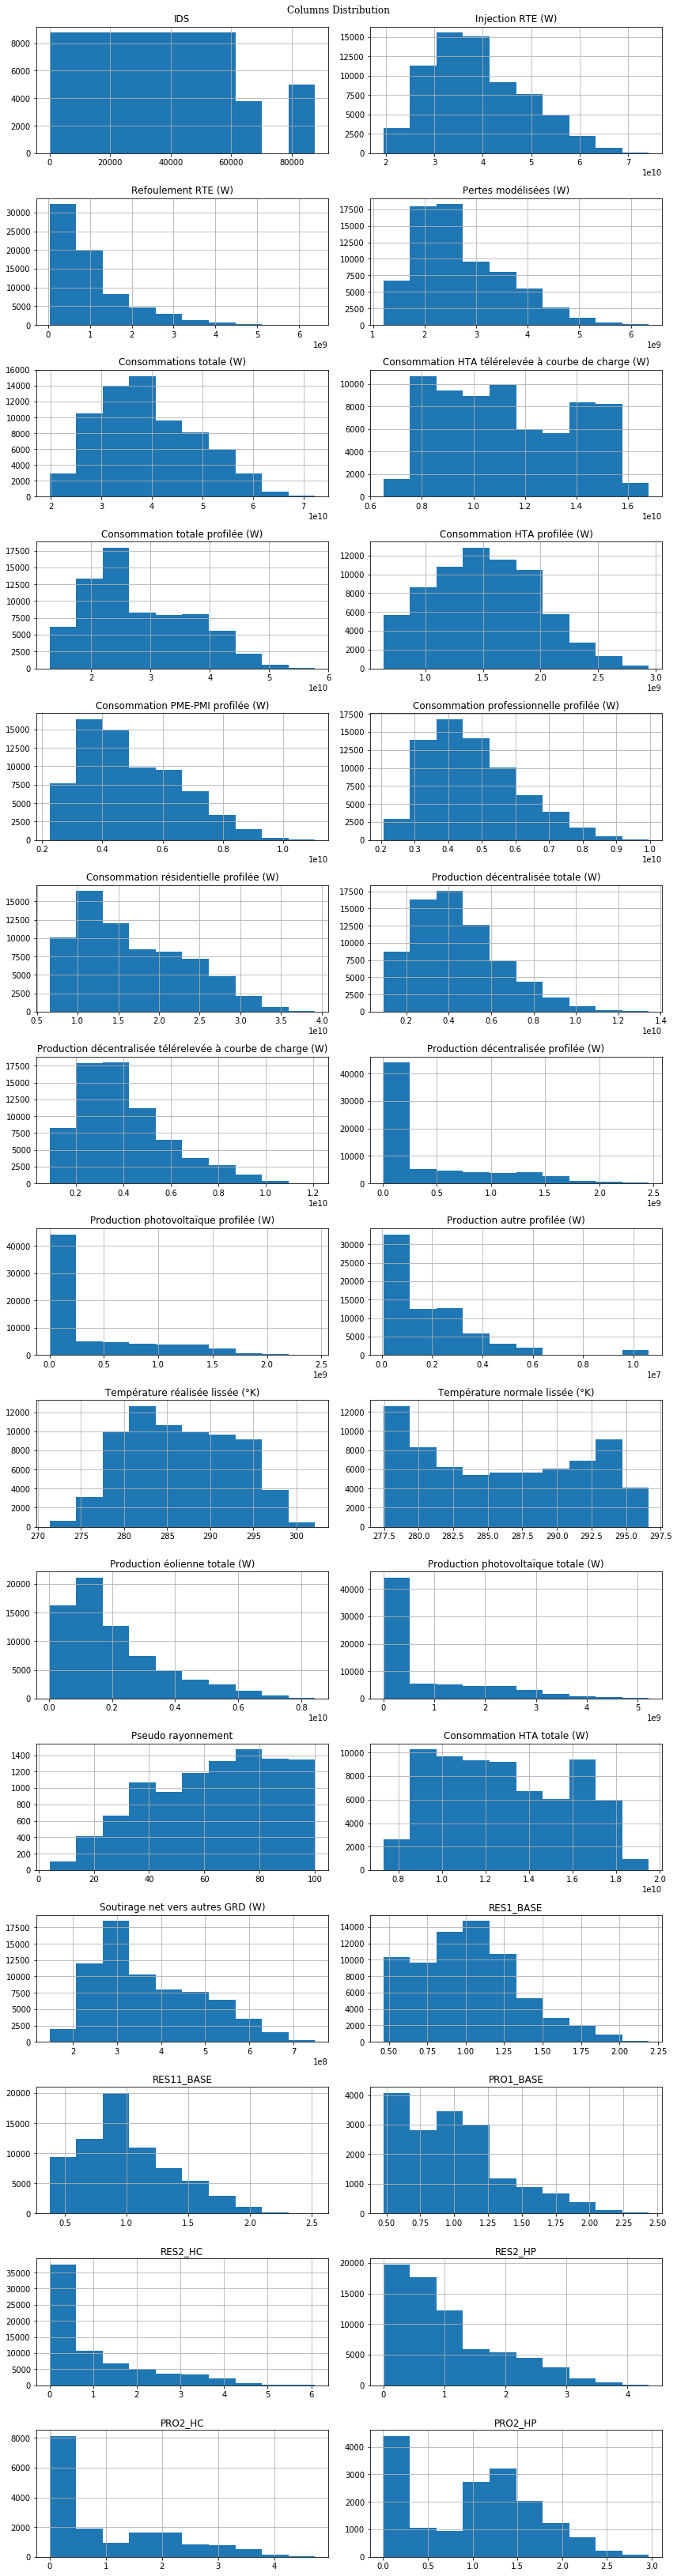

In [4]:
hist_plot(train)

# CORRELATIONS

## Features Correlation with Targets

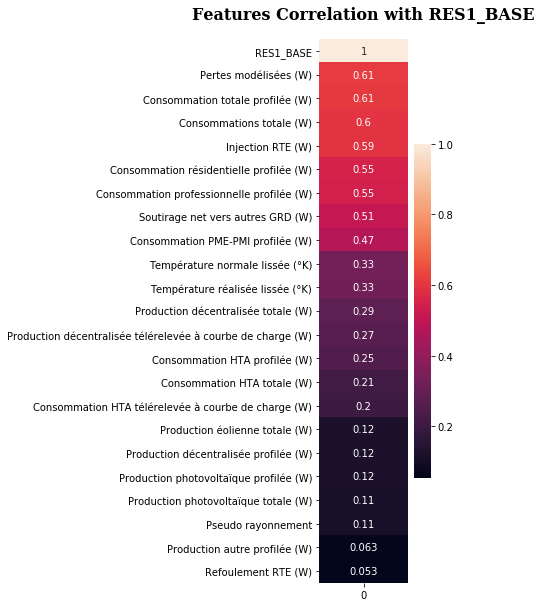

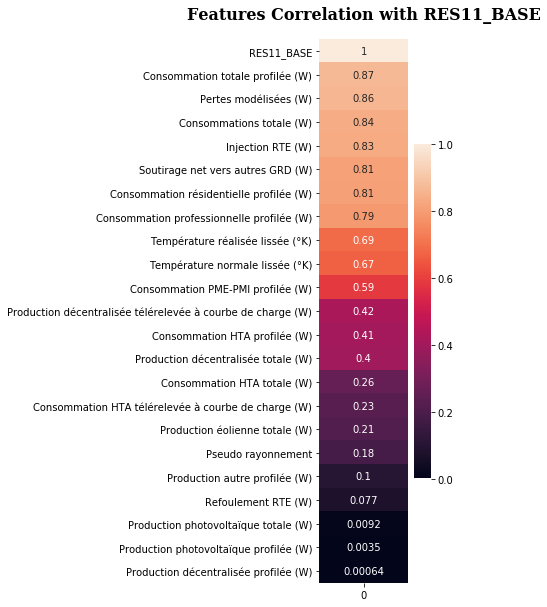

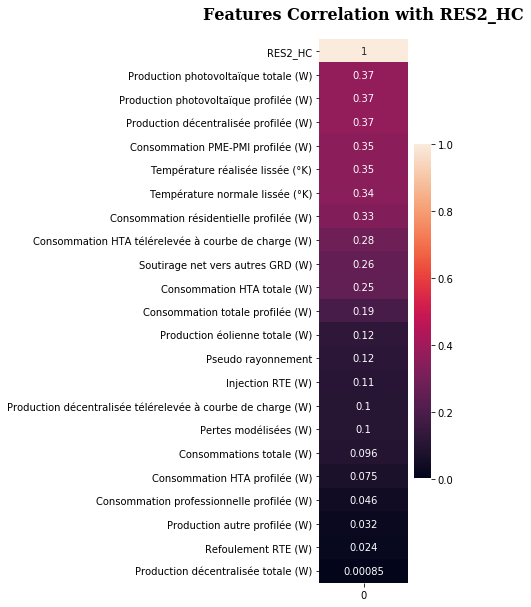

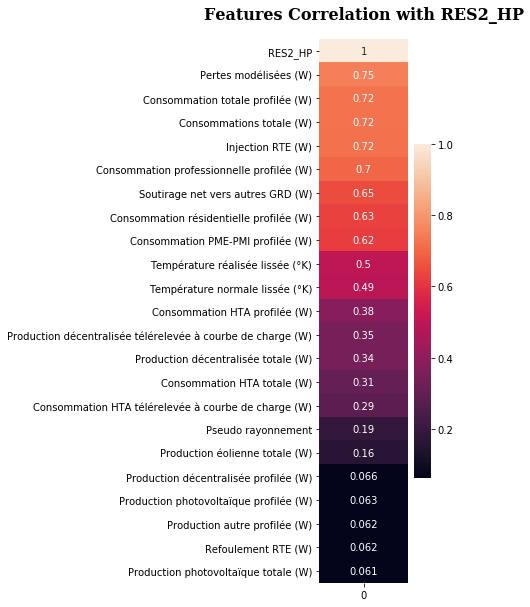

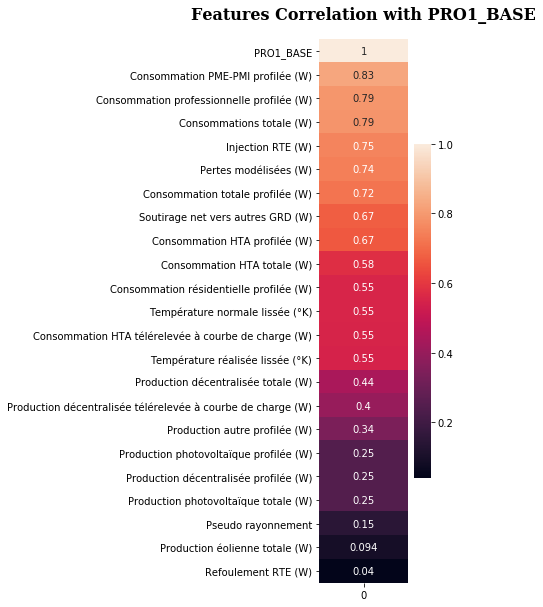

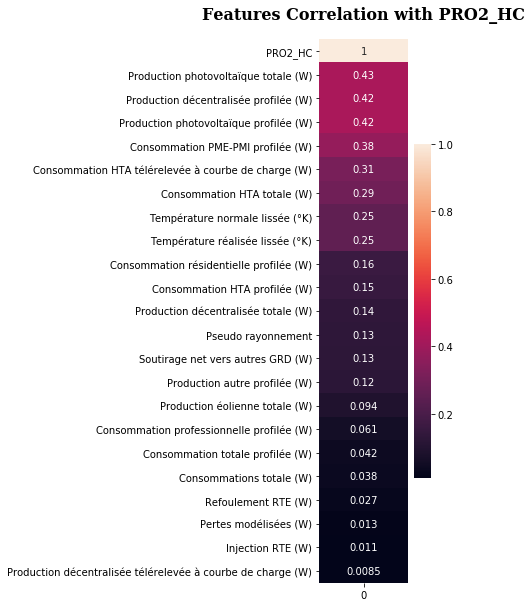

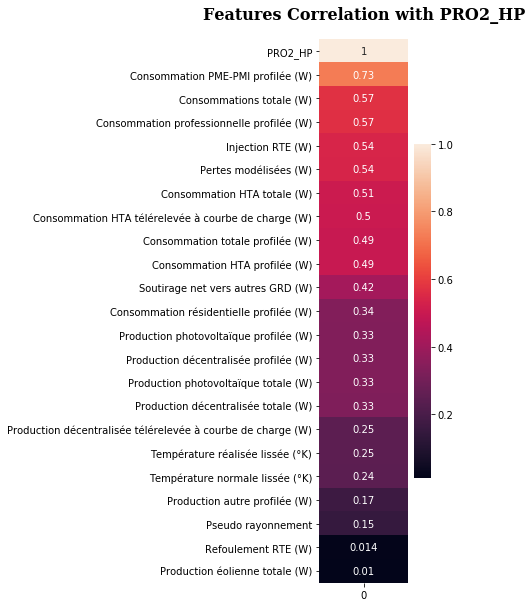

In [5]:
plot_feature_corr(train,TARGETS,True)

## Features Inter Correlation

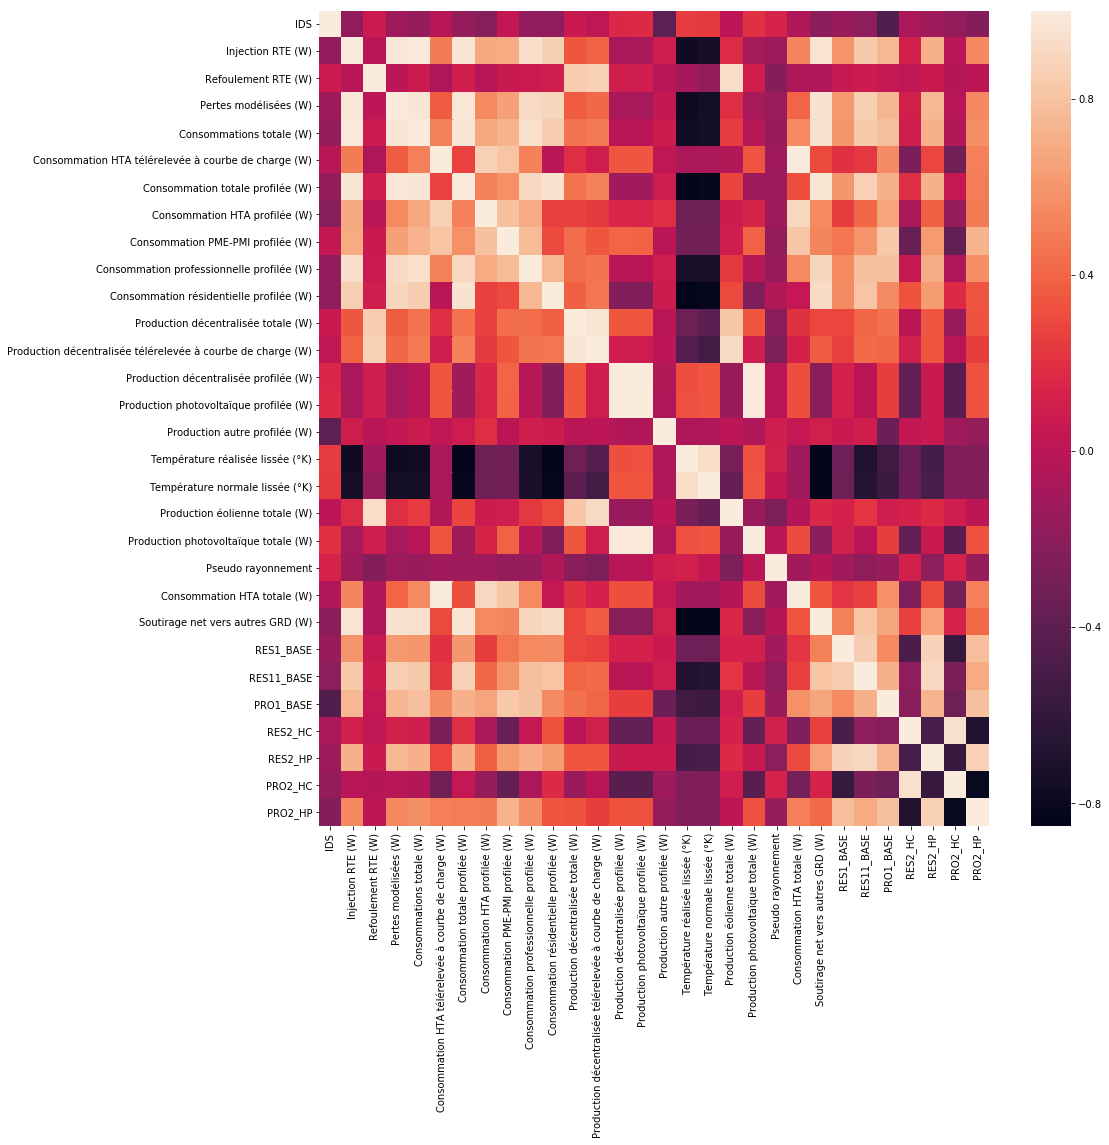

In [6]:
corr_matrix(train, True)

We can see that a lot of features are highly correlated with each other, it creates unnecessary complexity. We will have to delete some of them without fearing a lot of information loss.

# Time Series Analysis

## Simple plot

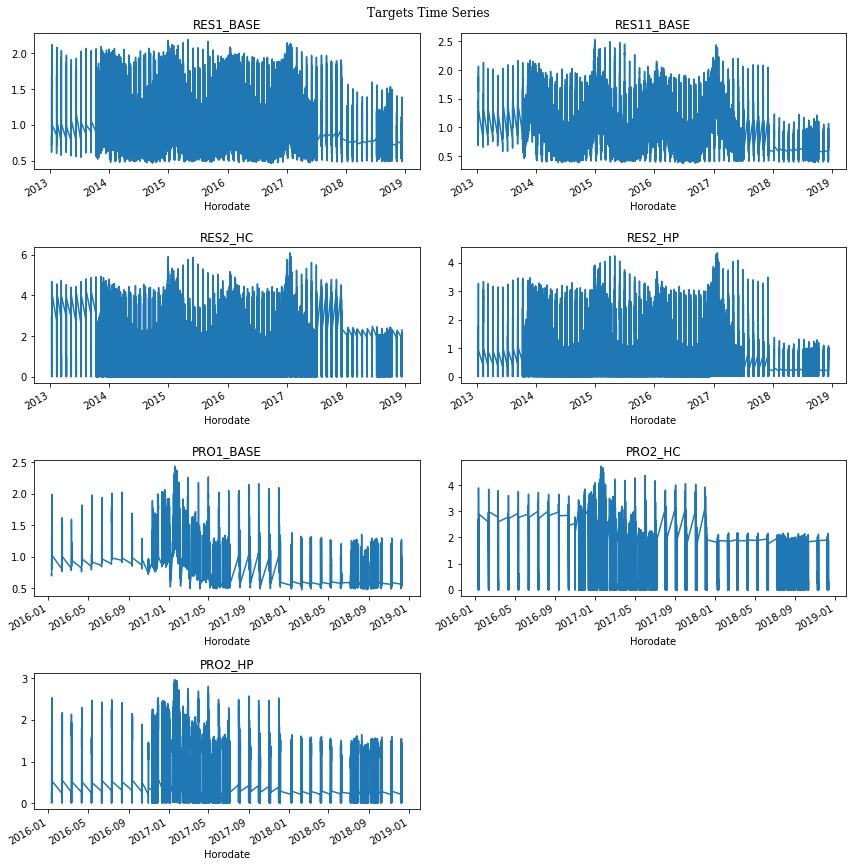

In [5]:
ts_simple_plot(train, TARGETS)

* First observation
    
   We can obvioulsy see that each target follows a trend. Moreover we observe that we have a lack of information in the begining and the end of the datasets, we probably will delete these periods to train our model. We also have a gap for the period from July 1st 2017 to June 30th 2018 which is normal because it matches the test period of the challenge. We will use this period to test our future model.
   
* Second observation

    If we look closer we can see than 

## Missing Data Problem

In [ ]:
#duree = list(pd.date_range(start="2013-01-01 00:00", end="2018-12-10 23:30", freq='0.5H').normalize())
#duree = pd.Series([1 if ind in list(train.index) else 0 for ind in duree], index=duree, name='Inter')

miss = pd.Series.from_csv('miss_data.csv', index_col=0, header=None)
miss_2013 = miss['2013-01-11':"2013-10-13"].copy()
miss_2018 = miss['2018-01-11':"2018-10-13"].copy()
miss_2018.index = miss_2013.index

plt.figure(figsize=(16,12))
plt.subplot(211)
plt.title('Missing Time Series Data')
miss.plot()
plt.subplot(212)
plt.title('Missing Time Series Data 2013 vs 2018')
miss_2013.plot(legend=True, label='2013 values')
plt.fill_between(miss_2013.index, 0, miss_2013)
miss_2018.plot(legend=True, label='2018 values')
plt.fill_between(miss_2018.index, 0, miss_2018)
plt.show()

## Time Series Trend Analysis

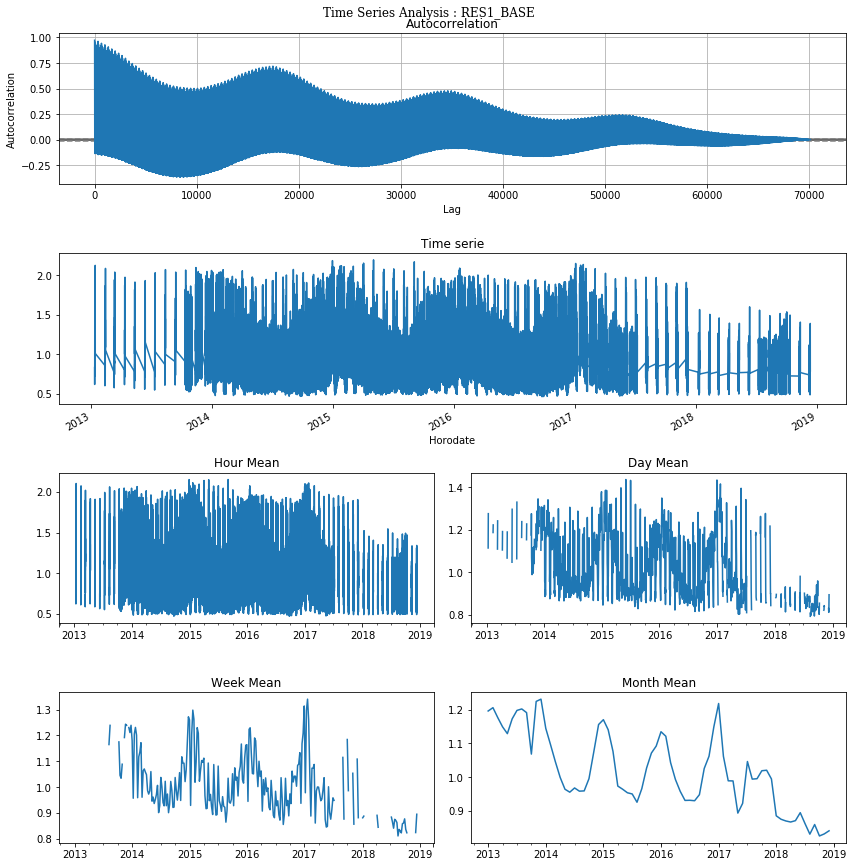

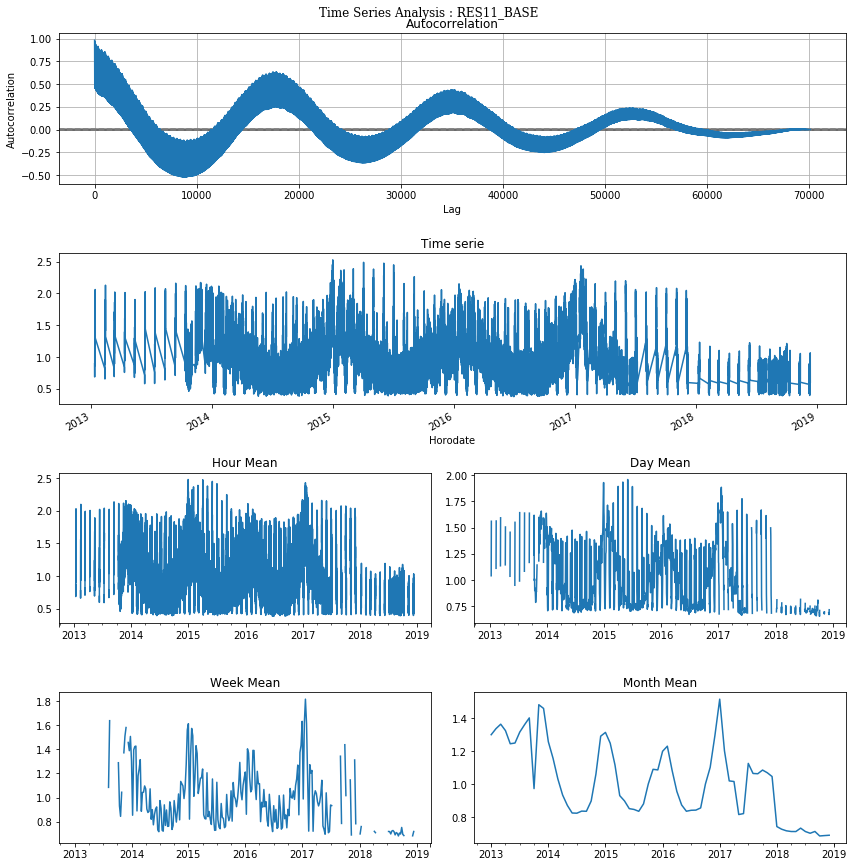

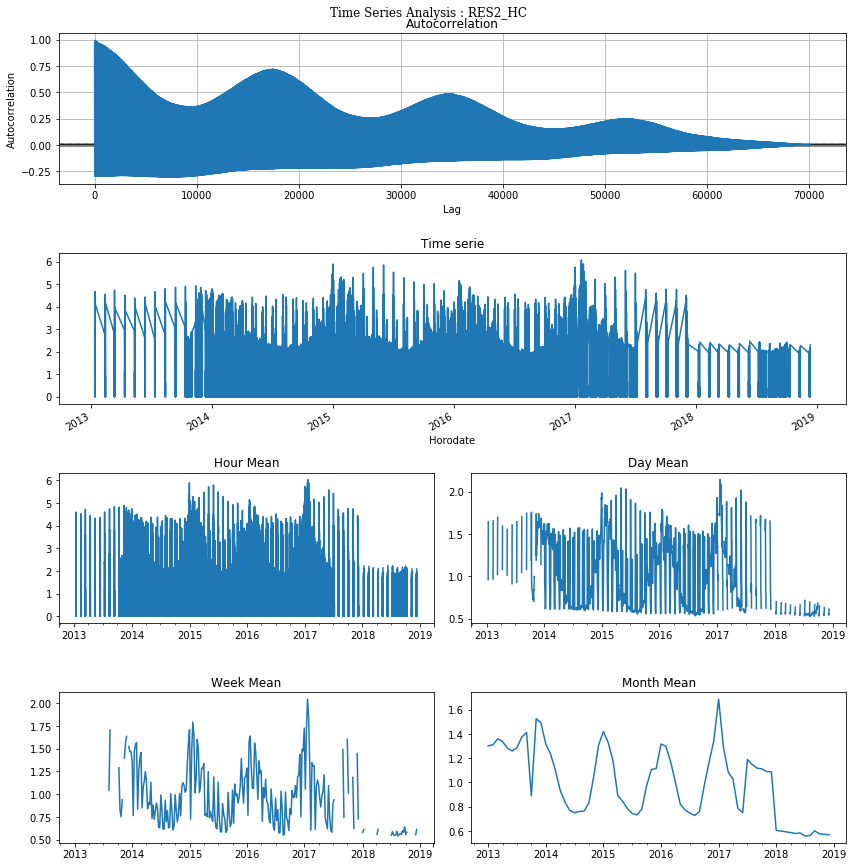

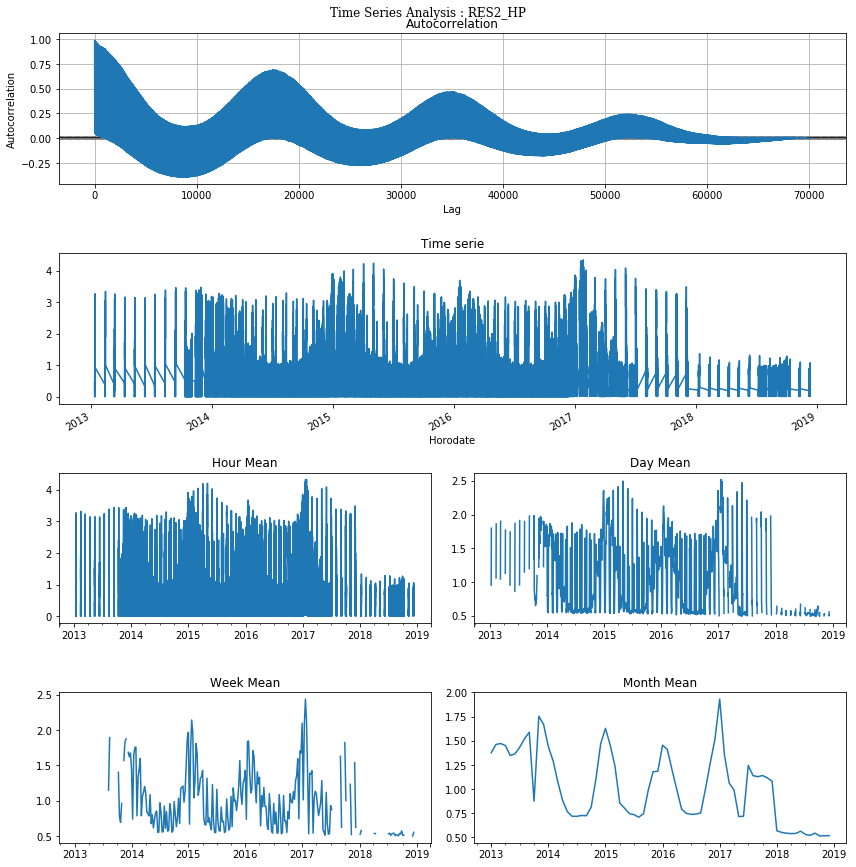

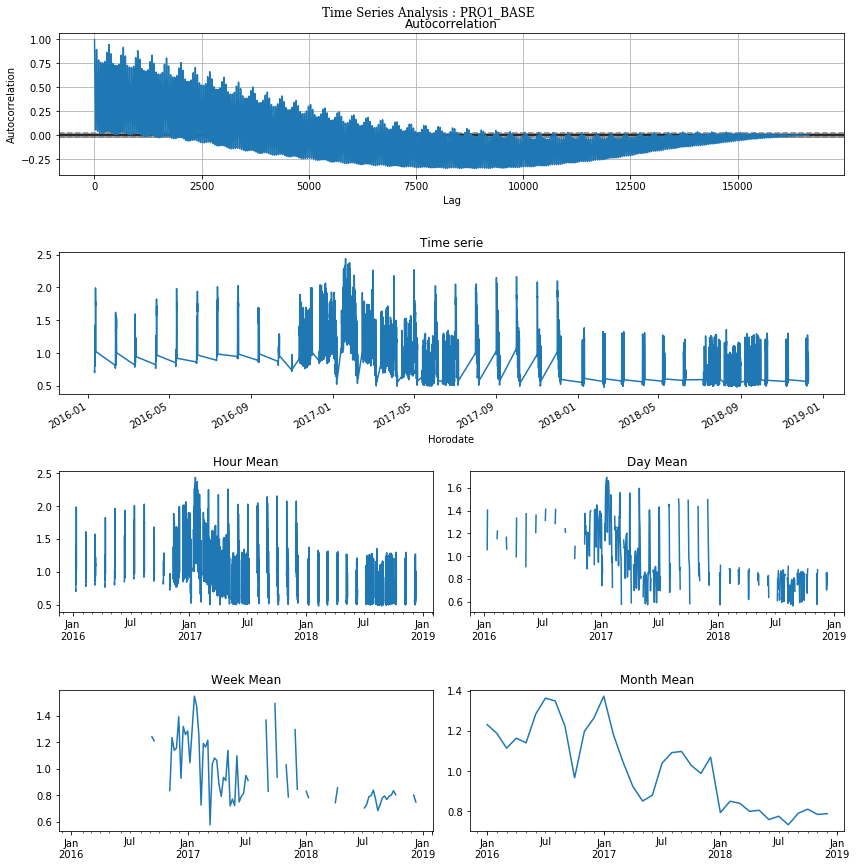

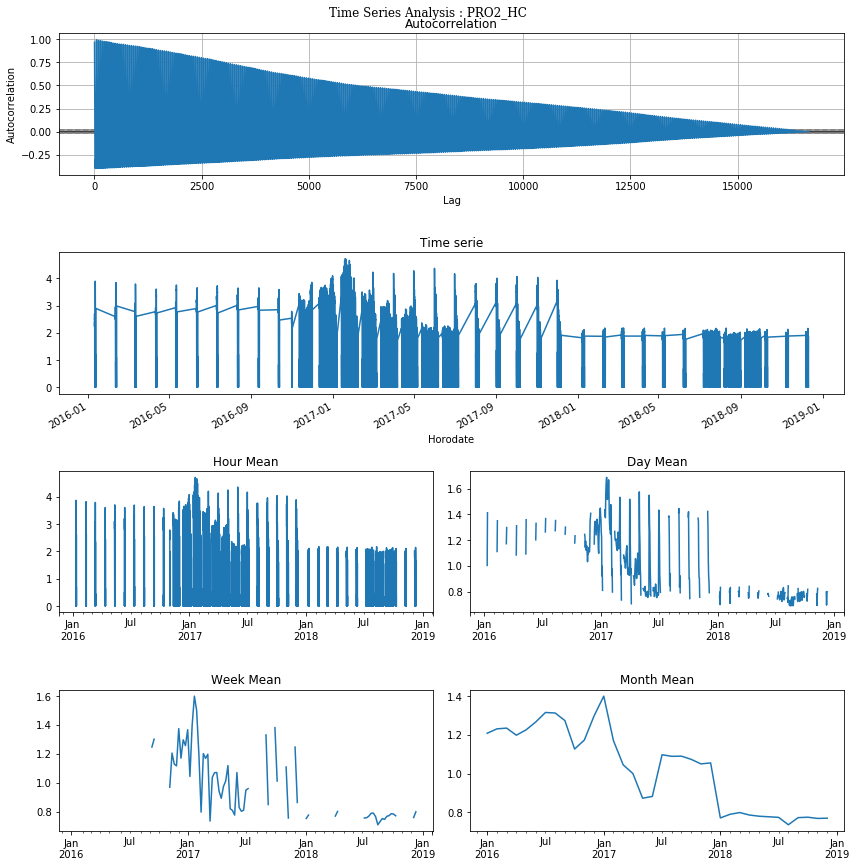

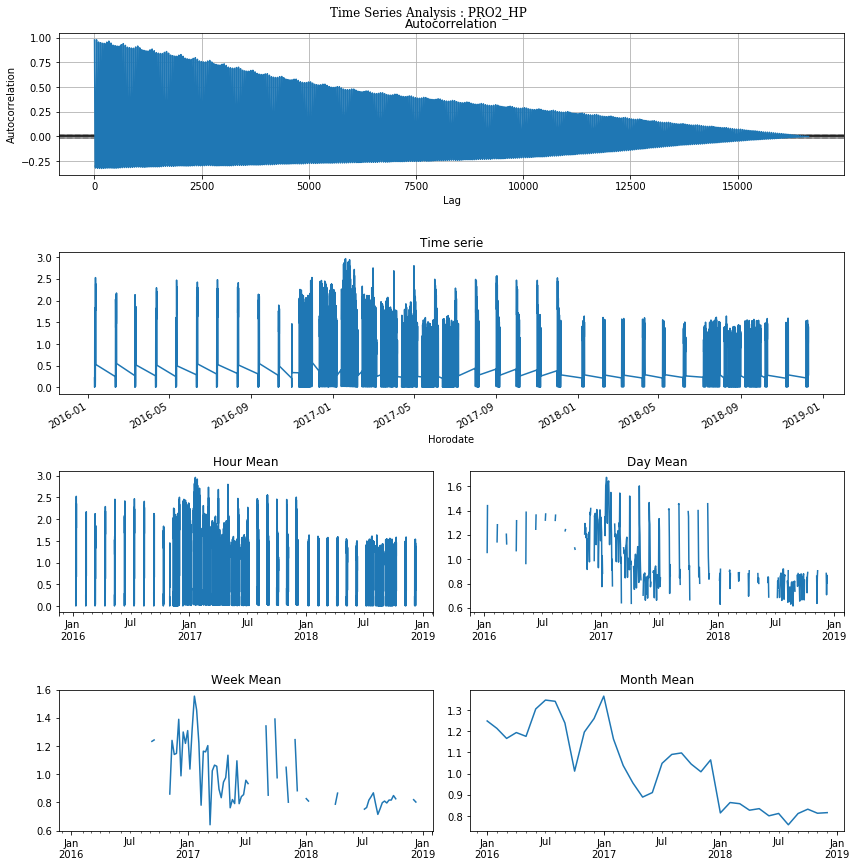

In [8]:
for target in TARGETS:
    ts_analysis_plot(train, target, save=False)

These graphs confirm our previous suggestions.

<IPython.core.display.Javascript object>


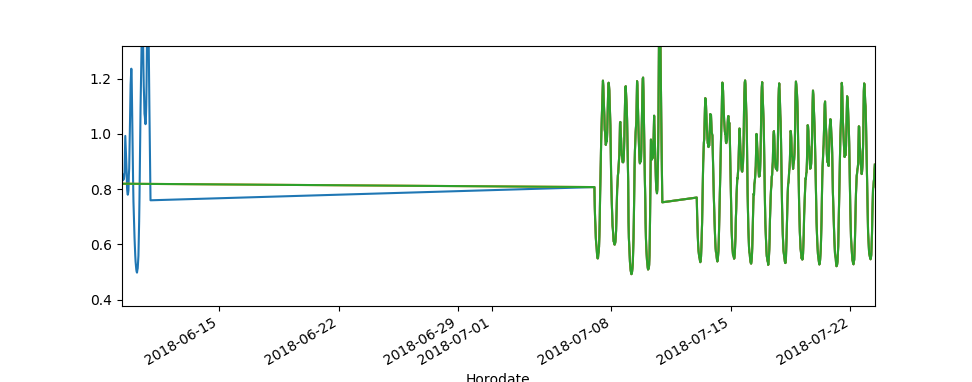

In [9]:
%matplotlib notebook
train['RES1_BASE'].plot()

# Data cleaning

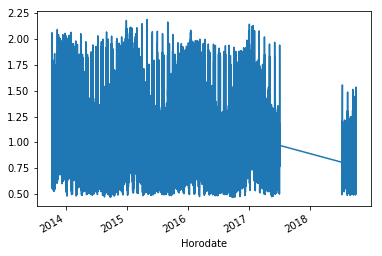

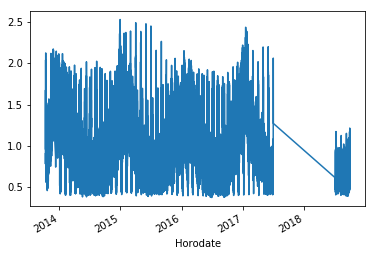

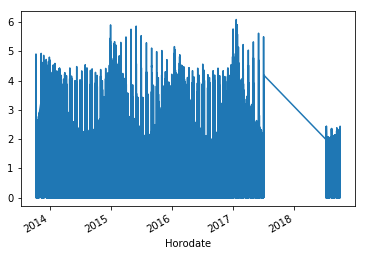

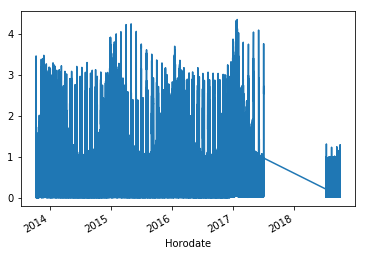

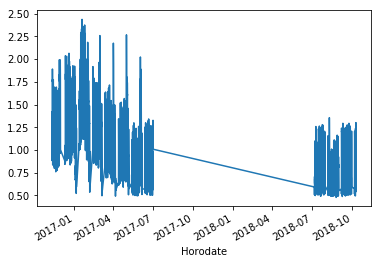

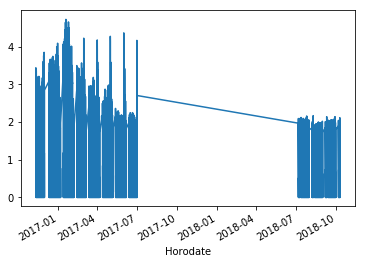

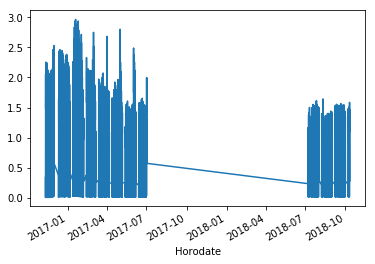

In [11]:
dfs = []
dfs_test = []
for target in TARGETS:
    
    cols = [x for x in list(train.columns) if x not in TARGETS]
    cols.append(target)
    df = train[cols].dropna()
    df_test = df['2017-07-01':'2018-07-07']
    
    if target.startswith('R'):
        
        df = pd.concat([df['2013-10-11':'2017-07-01'],df['2018-07-07':'2018-10-01']])
    
        
    else:
        
        df = pd.concat([df['2016-11-10':'2017-07-01'],df['2018-07-07':'2018-10-11']])
    
    plt.figure()
    df[target].plot()
    plt.show()
    
    dfs.append(df)
    dfs_test.append(df_test)
    

In [5]:
'RES'.startswith('R')

True

<IPython.core.display.Javascript object>


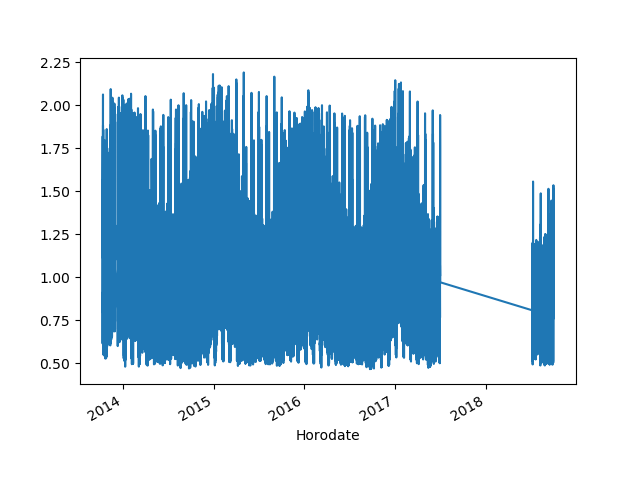

In [15]:
plt.figure()
pd.concat([train['2013-10-11':'2017-07-01'],train['2018-07-07':'2018-10-01']])['RES1_BASE'].plot()